In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
series = pd.Series([i+np.random.randint(10) for i in range(1, 100)])

In [6]:
result = seasonal_decompose(series, model='additive', period=1)

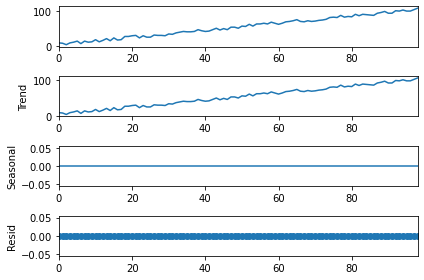

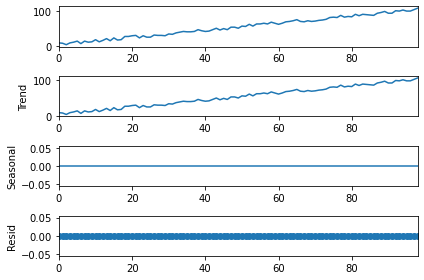

In [7]:
result.plot()

In [16]:
def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decompose_result.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decompose_result.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decompose_result.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

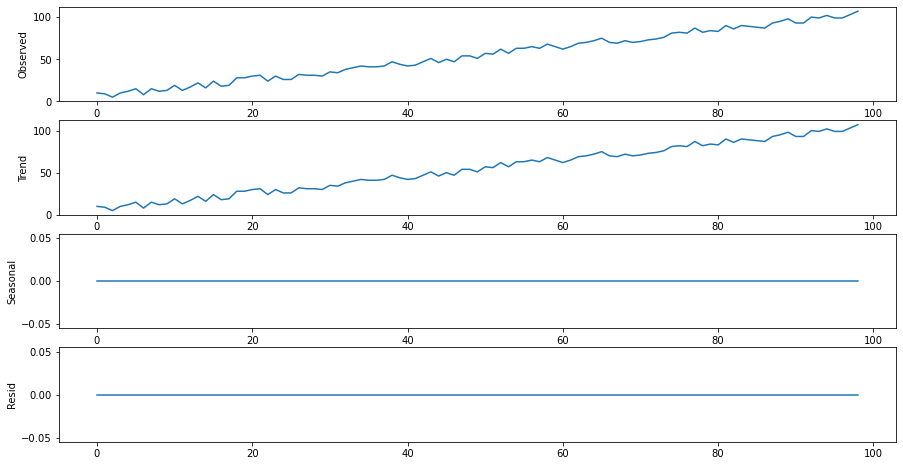

In [17]:
plot_decompose(result)

In [19]:
# y_t = Level * Error * Trend * Seasonality 여기에 log 취하면 additive 모델과 같다고 할 수 있다

In [21]:
series = pd.Series([i**2 for i in range(1, 100)])

<AxesSubplot:>

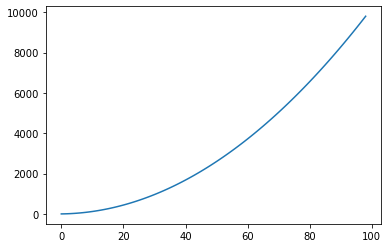

In [22]:
series.plot()

In [23]:
result = seasonal_decompose(series, model='multiplicative', period=1)

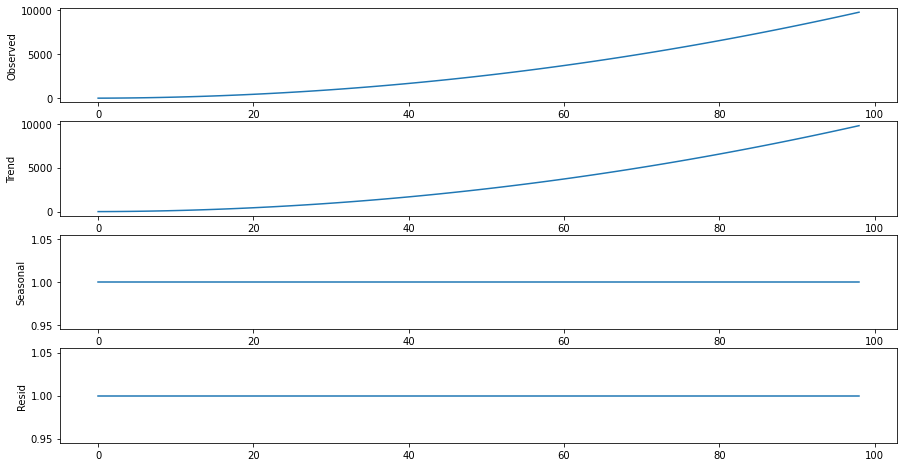

In [24]:
plot_decompose(result)

In [26]:
airline = pd.read_csv('./data/airline_passengers.csv', index_col='Month')

C:\ProgramData\Anaconda3\envs\tsa\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Month'>

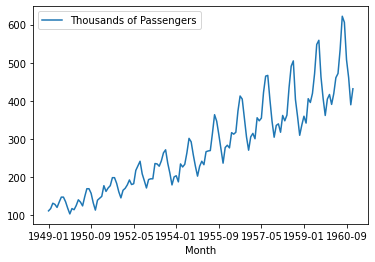

In [28]:
airline.plot()

In [30]:
airline.index = pd.to_datetime(airline.index)

In [31]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
result = \
seasonal_decompose(airline['Thousands of Passengers'],
                  model='multiplicative')

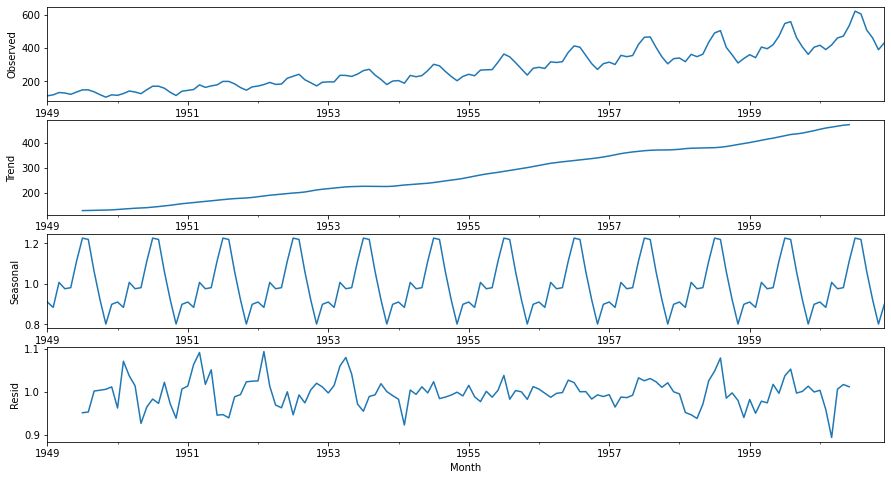

In [33]:
plot_decompose(result)